# Lending Club EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loan_2014 data

In [2]:
df = pd.read_csv('loan_2014.csv') 

C:\Users\Tong\Anaconda2\envs\py36\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (7,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(235631, 105)

In [4]:
cols=df.columns.values

In [5]:
df.tail()

,percentbcgt75,emptitle,mthssincerecentrevoldelinq,verificationstatusjoint,mthssincercntil,openactil,loanamnt,desc,collections12mthsexmed,pubrecbankruptcies,...,totcollamt,inqlast6mths,totalilhighcreditlimit,annualinc,bcutil,openrv24m,numoprevtl,verificationstatus,issued,loanstatus
235626,100.0,patrol,NaN,NaN,NaN,NaN,20700.0,Borrower added on 12/06/13 > I am going to c...,0.0,0.0,...,0.0,2.0,83482.0,46000.0,78.6,NaN,2.0,Verified,Jan-2014,Current
235627,11.1,Server Engineer Lead,13.0,NaN,NaN,NaN,2000.0,NaN,0.0,0.0,...,0.0,1.0,37200.0,83000.0,23.4,NaN,13.0,Verified,Jan-2014,Fully Paid
235628,50.0,NaN,9.0,NaN,NaN,NaN,10000.0,Borrower added on 12/04/13 > I will like a l...,0.0,0.0,...,0.0,0.0,65470.0,46000.0,83.9,NaN,4.0,Verified,Jan-2014,Fully Paid
235629,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
235630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Note: The last two rows are invalid for all features, so a feature without Nulls should have 235629 rows.

## Information about features: type & missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235631 entries, 0 to 235630
Columns: 105 entries, percentbcgt75 to loanstatus
dtypes: float64(85), object(20)
memory usage: 188.8+ MB


In [7]:
df.count()

percentbcgt75                 233072
emptitle                      222393
mthssincerecentrevoldelinq     84766
verificationstatusjoint            0
mthssincercntil                    0
openactil                          0
loanamnt                      235629
desc                           15279
collections12mthsexmed        235629
pubrecbankruptcies            235629
numactvrevtl                  235629
memberid                           0
term                          235629
taxliens                      235629
totalcutl                          0
numiltl                       235629
secappopenactil                    0
totalrevhilim                 235629
delinq2yrs                    235629
accnowdelinq                  235629
allutil                            0
avgcurbal                     235623
dti                           235629
accopenpast24mths             235629
numbctl                       235629
numtl120dpd2m                 227769
revolbal                      235629
t

In [8]:
df.count().tolist().count(0)

29

In [9]:
df.count().tolist().count(235629)

58

20 non-numeric, 85 numeric featues   
Among the 105 features, 58 of them have no Nulls, 29 of them are all Nulls, 18 have Nulls)

## Find all null features, numeric features,  and non-numeric (categorical) features

In [10]:
all_null_feature=[]
num_feature=[]
cat_feature=[]
for col in cols:
    if df[col].isnull().sum()==df.shape[0]:
        all_null_feature.append(col)
    else:
        if df[col].dtype == 'object':
            cat_feature.append(col)
        else:
            num_feature.append(col)    

In [105]:
print (len(num_feature), len(cat_feature))
print (len(all_null_feature))

56 20
29


In [106]:
all_null_feature

['verificationstatusjoint',
 'mthssincercntil',
 'openactil',
 'memberid',
 'totalcutl',
 'secappopenactil',
 'allutil',
 'secappinqlast6mths',
 'secappchargeoffwithin12mths',
 'secapprevolutil',
 'inqlast12m',
 'secappmortacc',
 'openrv12m',
 'secappcollections12mthsexmed',
 'openacc6m',
 'secappopenacc',
 'revolbaljoint',
 'secappnumrevaccts',
 'secappmthssincelastmajorderog',
 'maxbalbc',
 'openil24m',
 'secappearliestcrline',
 'annualincjoint',
 'dtijoint',
 'openil12m',
 'inqfi',
 'ilutil',
 'totalbalil',
 'openrv24m']

In [13]:
num_feature

['percentbcgt75',
 'mthssincerecentrevoldelinq',
 'loanamnt',
 'collections12mthsexmed',
 'pubrecbankruptcies',
 'numactvrevtl',
 'taxliens',
 'numiltl',
 'totalrevhilim',
 'delinq2yrs',
 'accnowdelinq',
 'avgcurbal',
 'dti',
 'accopenpast24mths',
 'numbctl',
 'numtl120dpd2m',
 'revolbal',
 'totcurbal',
 'totalacc',
 'openacc',
 'fundedamnt',
 'tothicredlim',
 'numsats',
 'mosinoldilacct',
 'mthssincelastdelinq',
 'delinqamnt',
 'totalbclimit',
 'chargeoffwithin12mths',
 'mthssincerecentinq',
 'numrevtlbalgt0',
 'numtl90gdpd24m',
 'mthssincelastmajorderog',
 'mthssincerecentbc',
 'totalbalexmort',
 'numacctsever120pd',
 'mosinrcntrevtlop',
 'mthssincerecentbcdlq',
 'numtl30dpd',
 'numtloppast12m',
 'mosinrcnttl',
 'numbcsats',
 'pcttlnvrdlq',
 'installment',
 'mortacc',
 'numactvbctl',
 'mosinoldrevtlop',
 'numrevaccts',
 'mthssincelastrecord',
 'pubrec',
 'bcopentobuy',
 'totcollamt',
 'inqlast6mths',
 'totalilhighcreditlimit',
 'annualinc',
 'bcutil',
 'numoprevtl']

In [14]:
cat_feature

['emptitle',
 'desc',
 'term',
 'id',
 'zipcode',
 'intrate',
 'initialliststatus',
 'homeownership',
 'grade',
 'revolutil',
 'applicationtype',
 'emplength',
 'addrstate',
 'disbursementmethod',
 'subgrade',
 'earliestcrline',
 'purpose',
 'verificationstatus',
 'issued',
 'loanstatus']

## Examine each categorical feature, and consider how to work on them in the next step

In [15]:
# has 13236 NAs, can do frequency 
i=0
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()))
df[feat].value_counts()[:30]

emptitle
13238
75352


Teacher                     4569
Manager                     3772
Registered Nurse            1960
RN                          1816
Supervisor                  1663
Owner                       1512
Sales                       1406
Project Manager             1368
Office Manager              1185
manager                     1115
Driver                      1111
General Manager             1055
teacher                     1028
Director                    1000
Engineer                     870
President                    852
owner                        850
Vice President               827
driver                       822
Attorney                     708
Administrative Assistant     706
Operations Manager           699
Accountant                   663
supervisor                   653
Police Officer               627
sales                        613
Sales Manager                592
Account Manager              566
Executive Assistant          564
Store Manager                562
Name: empt

In [16]:
# only 15279 not null values, consider just drop it.
# or consider the length of the description, or NA
# or drop: because similar information can be acquired from "purpose"
i=1
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

desc
220352


  Borrower added on 03/17/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                            11
  Borrower added on 03/10/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                            10
  Borrower added on 02/19/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                             9
  Borrower added on 01/29/14

In [17]:
# only use 36 months data for the project
i=2
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (df.term.value_counts(normalize=True))
df[feat].value_counts()

term
2
 36 months    0.689941
 60 months    0.310059
Name: term, dtype: float64


 36 months    162570
 60 months     73059
Name: term, dtype: int64

In [18]:
i=3
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())

id
235629


In [19]:
# only keep first 3 digits, 866 values, use frequency and leave on out encoding
i=4
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()))
df[feat].value_counts()

zipcode
2
866


750xx    2546
945xx    2418
112xx    2382
606xx    2273
300xx    2085
070xx    1936
331xx    1929
100xx    1912
770xx    1795
900xx    1787
117xx    1700
917xx    1685
104xx    1654
891xx    1635
330xx    1606
852xx    1528
921xx    1427
913xx    1391
926xx    1355
925xx    1315
604xx    1272
080xx    1267
600xx    1250
601xx    1242
481xx    1235
334xx    1230
113xx    1218
853xx    1135
956xx    1114
920xx    1106
         ... 
582xx       1
663xx       1
836xx       1
587xx       1
680xx       1
516xx       1
429xx       1
901xx       1
909xx       1
938xx       1
093xx       1
513xx       1
510xx       1
500xx       1
511xx       1
832xx       1
685xx       1
888xx       1
854xx       1
008xx       1
821xx       1
527xx       1
889xx       1
524xx       1
929xx       1
861xx       1
353xx       1
833xx       1
682xx       1
523xx       1
Name: zipcode, Length: 866, dtype: int64

In [20]:
# get rid of %, into float
i=5
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

intrate
2


 12.99%    12630
 10.99%    10684
 15.61%    10310
 12.49%     9704
 13.98%     8856
 14.99%     8101
 17.57%     7686
 13.35%     7620
 11.67%     7255
 14.49%     7244
 11.99%     6199
 10.15%     6116
 16.99%     5946
  9.17%     5655
  8.39%     5575
 16.29%     5414
  6.03%     5146
  7.69%     4962
  6.49%     4026
 18.24%     3597
  9.67%     3455
  8.90%     3384
 18.99%     3214
  7.12%     3055
 14.64%     3029
 14.16%     2952
 19.52%     2926
  7.90%     2885
 15.31%     2838
 13.65%     2753
           ...  
 20.49%      983
 17.14%      974
 16.49%      968
 24.99%      963
 21.99%      916
 21.18%      858
  6.99%      855
 17.86%      765
 18.54%      720
 19.22%      663
 25.57%      647
 19.24%      588
 22.45%      558
 25.80%      526
 19.97%      517
 20.50%      470
 25.83%      426
 21.48%      332
 25.89%      305
 22.40%      276
 22.99%      241
 25.99%      214
 23.40%      214
 22.90%      212
 26.06%      212
 23.99%      179
 23.70%      163
  6.00%       

In [21]:
i=6
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

initialliststatus
2


w    123473
f    112156
Name: initialliststatus, dtype: int64

In [22]:
# one hot encoding, but ignore the 1 data point ANY
i=7
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

homeownership
2


MORTGAGE    119937
RENT         92684
OWN          23007
ANY              1
Name: homeownership, dtype: int64

In [23]:
i=8
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

grade
2


C    66565
B    61935
D    42992
A    36108
E    20121
F     6223
G     1685
Name: grade, dtype: int64

In [24]:
i=9
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()))
df[feat].value_counts()

revolutil
127
1160


0%        590
59%       520
58%       515
53%       512
48%       485
50%       483
55%       479
54%       472
57%       472
46%       471
52%       467
61%       466
62%       466
47%       462
51%       457
60%       451
67%       450
65%       442
49%       441
63%       441
64%       438
40%       436
66%       429
68%       428
56%       428
43%       428
44%       423
69%       422
41%       421
45%       416
         ... 
127.4%      1
146.1%      1
105.4%      1
122.2%      1
123%        1
105%        1
120%        1
148%        1
113.8%      1
110.1%      1
107.8%      1
118.2%      1
119.1%      1
113.3%      1
108.9%      1
116.1%      1
109.5%      1
112.2%      1
137.8%      1
366.6%      1
153%        1
113.1%      1
123.9%      1
130.2%      1
118%        1
116.8%      1
130.1%      1
134.3%      1
106%        1
111%        1
Name: revolutil, Length: 1160, dtype: int64

In [25]:
# all "individual", that is the reason for all join-stuff are NA
# drop it
i=10
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

applicationtype
2


Individual    235629
Name: applicationtype, dtype: int64

In [26]:
# 11 values, NA, <1 year, 1~9 year(s), 10+ years, convert to num
i=11
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()))
df[feat].value_counts()

emplength
12021
11


10+ years    79505
2 years      20487
3 years      18267
< 1 year     17982
1 year       14593
4 years      13528
7 years      13099
5 years      13051
8 years      11853
6 years      11821
9 years       9424
Name: emplength, dtype: int64

In [27]:
# 49 states, can generate frequency and leave-one-out encoding
i=12
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()))
df[feat].value_counts()

addrstate
2
49


CA    33288
NY    19923
TX    18967
FL    15691
IL     9628
NJ     8863
PA     8427
OH     8011
GA     7600
VA     6965
NC     6442
MI     6205
MD     5564
AZ     5507
MA     5232
WA     5118
CO     4929
MN     4276
IN     4206
TN     3907
MO     3788
CT     3483
NV     3225
WI     3101
AL     3034
SC     2971
OR     2912
LA     2761
KY     2379
OK     2118
KS     2103
AR     1806
UT     1669
NM     1367
WV     1311
MS     1197
HI     1196
NH     1155
RI     1043
MT      731
DE      661
DC      637
AK      598
WY      583
VT      542
SD      506
ME        1
IA        1
ID        1
Name: addrstate, dtype: int64

In [28]:
# all cash, has no use
i=13
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

disbursementmethod
2


Cash    235629
Name: disbursementmethod, dtype: int64

In [29]:
i=14
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

subgrade
2


C2    13965
C3    13794
C1    13498
B4    13475
B5    13309
C4    13093
B3    13075
C5    12215
B2    11439
D1    10880
A5    10761
B1    10637
D2     9544
A4     9124
D3     8487
D4     7881
D5     6200
A3     5842
E1     5589
A2     5234
A1     5147
E2     4831
E3     3902
E4     3101
E5     2698
F1     1935
F2     1355
F3     1321
F4      964
F5      648
G1      527
G2      427
G3      305
G4      214
G5      212
Name: subgrade, dtype: int64

In [30]:
# date format, convert to time difference, eg, months to 2015 and thus is a numeric feature
i=15
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
df[feat].value_counts()

earliestcrline
2


Aug-2001    1980
Aug-2000    1945
Sep-2000    1719
Aug-2002    1711
Aug-1999    1696
Oct-2000    1658
Sep-1999    1642
Oct-2001    1574
Sep-2002    1574
Sep-2001    1562
Oct-1999    1543
Nov-1999    1525
Sep-1998    1505
Oct-2002    1472
Nov-2000    1468
Mar-2001    1452
Nov-2001    1440
Jul-2001    1421
Sep-2003    1415
Mar-2000    1399
Aug-2003    1389
May-2001    1384
Oct-1998    1371
Jul-2002    1370
Jun-2000    1366
Jun-2001    1356
Jul-2000    1351
Apr-2001    1347
Oct-2003    1327
Aug-1998    1312
            ... 
Oct-1950       1
May-1950       1
Feb-1961       1
Oct-1962       1
Jul-1958       1
Jul-1961       1
Jun-1949       1
Aug-1961       1
Mar-1959       1
Dec-1960       1
Jan-1953       1
Aug-1962       1
Dec-1963       1
May-1958       1
Jan-1948       1
Nov-1956       1
Mar-1962       1
Mar-1961       1
Jan-1954       1
Sep-1957       1
Jan-1944       1
Aug-1960       1
Aug-1946       1
May-1963       1
Mar-1960       1
Dec-1956       1
Aug-1958       1
Oct-1958      

In [31]:
i=16
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()))
df[feat].value_counts()

purpose
2
13


debt_consolidation    143006
credit_card            55522
home_improvement       13045
other                  10371
major_purchase          3858
medical                 2331
small_business          2277
car                     1832
moving                  1328
vacation                1178
house                    750
renewable_energy         123
wedding                    8
Name: purpose, dtype: int64

In [32]:
i=17
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()))
df[feat].value_counts()

verificationstatus
2
3


Source Verified    97741
Not Verified       70659
Verified           67229
Name: verificationstatus, dtype: int64

In [33]:
# use this to split train and test data
i=18
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()))
df[feat].value_counts()

issued
2
12


Oct-2014    38783
Jul-2014    29306
Nov-2014    25054
May-2014    19099
Apr-2014    19071
Aug-2014    18814
Jun-2014    17179
Mar-2014    16513
Jan-2014    15628
Feb-2014    15269
Sep-2014    10606
Dec-2014    10307
Name: issued, dtype: int64

In [34]:
# training target
# fully paid = 0; charged off = 1
i=19
feat = cat_feature[i]
print (feat)
print (df[feat].isnull().sum())
print (len(df[feat].value_counts()))
df[feat].value_counts()

loanstatus
2
7


Fully Paid            171825
Charged Off            38940
Current                23385
Late (31-120 days)       840
In Grace Period          476
Late (16-30 days)        162
Default                    1
Name: loanstatus, dtype: int64

### More Exploration on Categorical Variables

In [35]:
df = df.query("loanstatus == 'Fully Paid' or loanstatus == 'Charged Off' ")

In [36]:
df['loanstatus'] = df.loanstatus.map({"Charged Off": 1, "Fully Paid": 0})

In [38]:
df = df.query("term ==' 36 months'")

In [39]:
len(df['loanstatus'])

162474

In [ ]:
cat_feature.

In [40]:
cat_feature[0:18]

['emptitle',
 'desc',
 'term',
 'id',
 'zipcode',
 'intrate',
 'initialliststatus',
 'homeownership',
 'grade',
 'revolutil',
 'applicationtype',
 'emplength',
 'addrstate',
 'disbursementmethod',
 'subgrade',
 'earliestcrline',
 'purpose',
 'verificationstatus']

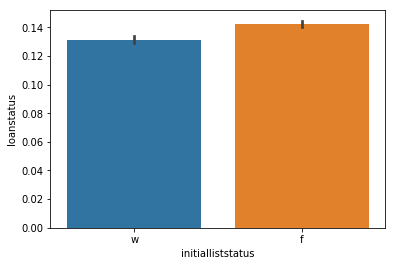

In [42]:
sns.barplot(x=cat_feature[6], y='loanstatus', data=df)

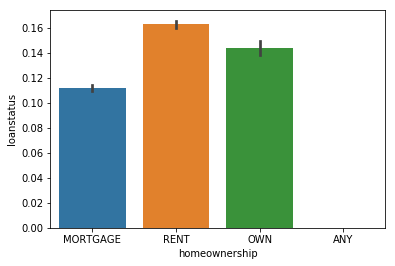

In [43]:
sns.barplot(x=cat_feature[7], y='loanstatus', data=df)

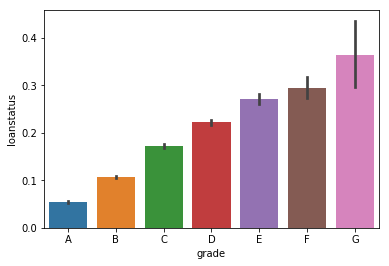

In [48]:
sns.barplot(x=cat_feature[8], y='loanstatus', data=df, order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

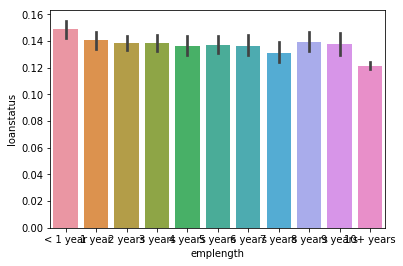

In [49]:
sns.barplot(x=cat_feature[11], y='loanstatus', data=df, order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years'])

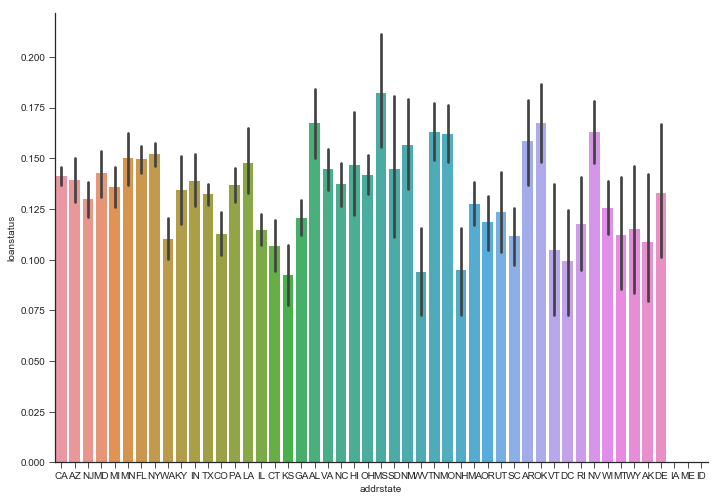

In [54]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.barplot(x=cat_feature[12], y='loanstatus', data=df, ax=ax)
sns.despine()

In [51]:
np.sort(df.subgrade.unique())

array(['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1',
       'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3',
       'G4', 'G5'], dtype=object)

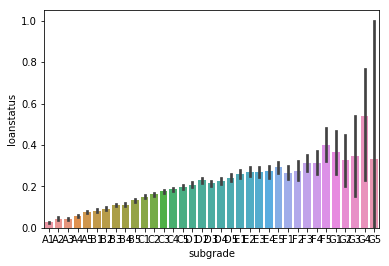

In [52]:
sns.barplot(x=cat_feature[14], y='loanstatus', data=df, order = np.sort(df.subgrade.unique()))

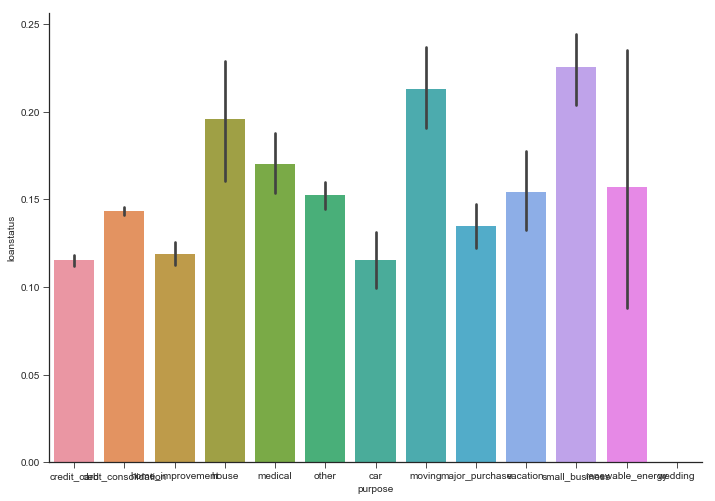

In [55]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.barplot(x=cat_feature[16], y='loanstatus', data=df, ax=ax)
sns.despine()

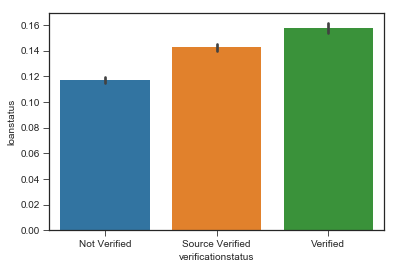

In [56]:
sns.barplot(x=cat_feature[17], y='loanstatus', data=df)

## Exploration of the numeric features

### 1. Histograms

In [57]:
def column_index(df, query_cols):
    cols = df.columns.values
    sidx = np.argsort(cols)
    return sidx[np.searchsorted(cols,query_cols,sorter=sidx)]

In [58]:
numcol = column_index(df, num_feature)

C:\Users\Tong\Anaconda2\envs\py36\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


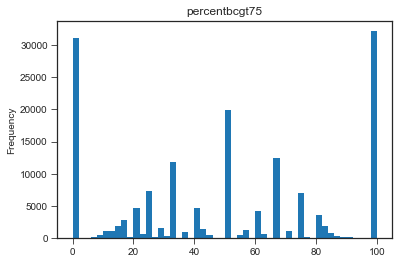

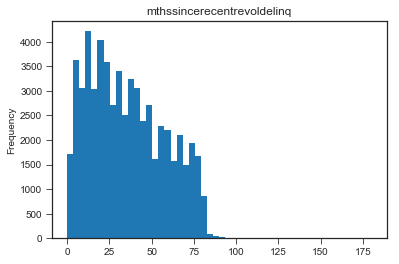

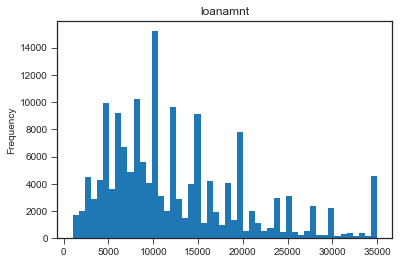

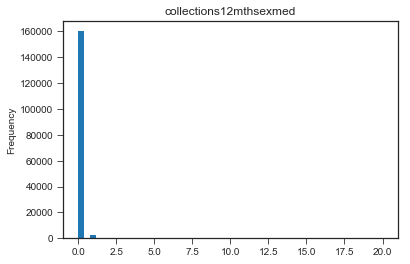

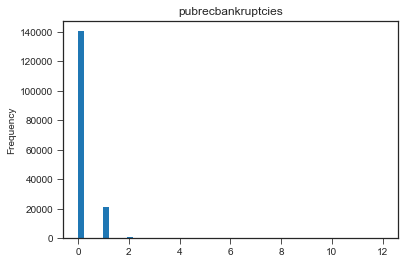

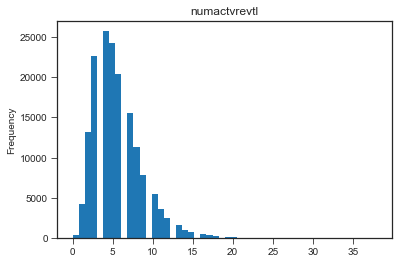

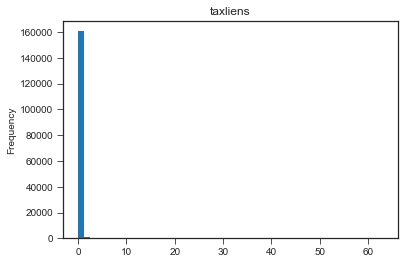

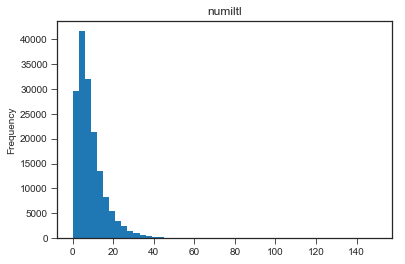

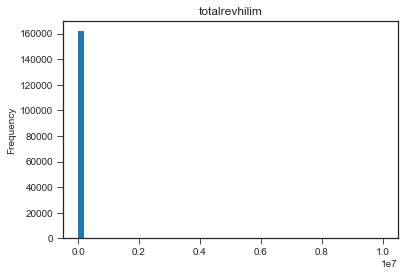

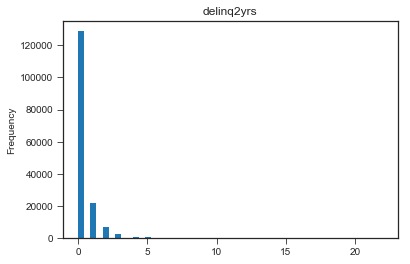

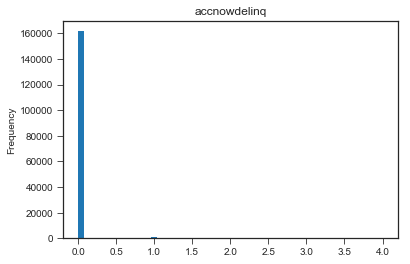

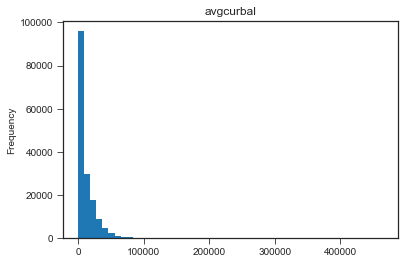

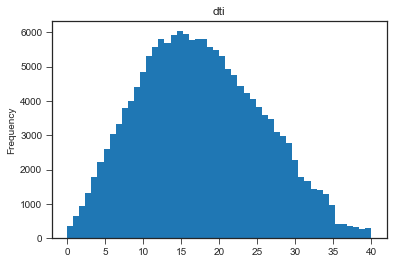

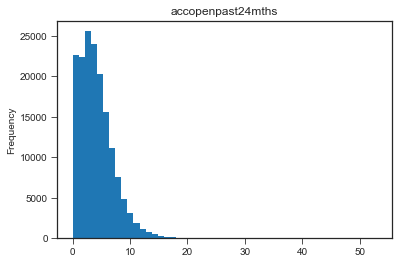

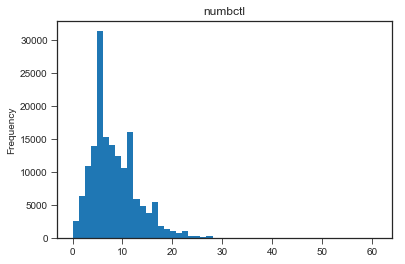

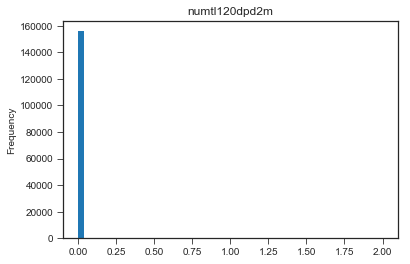

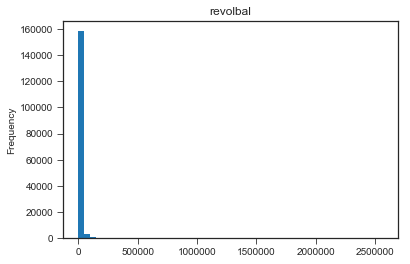

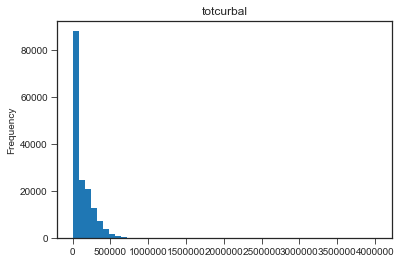

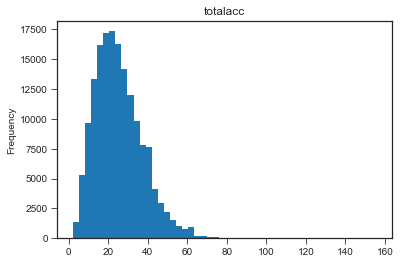

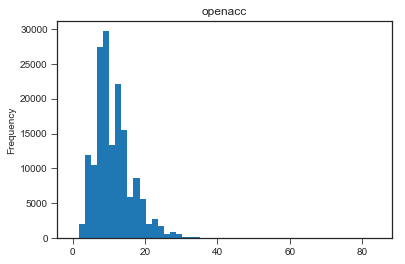

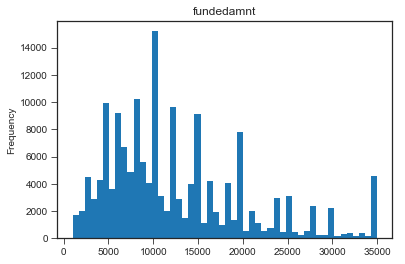

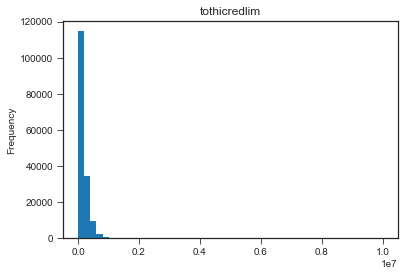

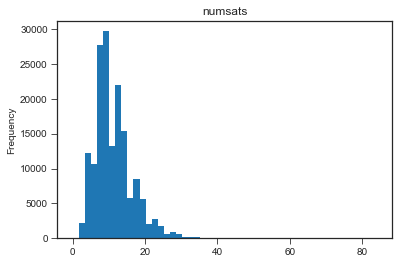

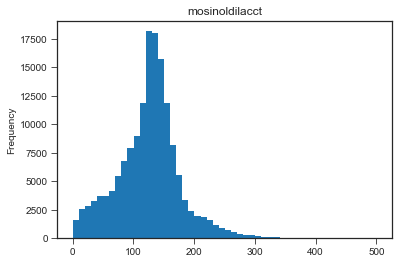

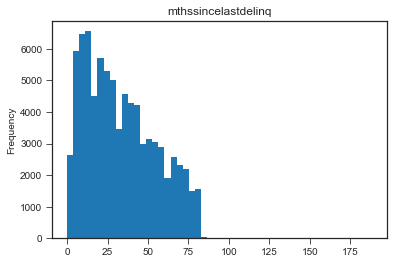

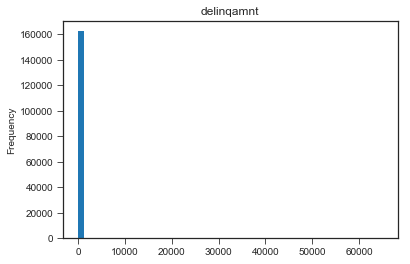

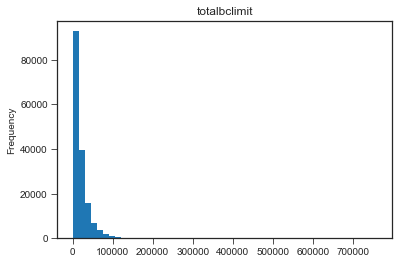

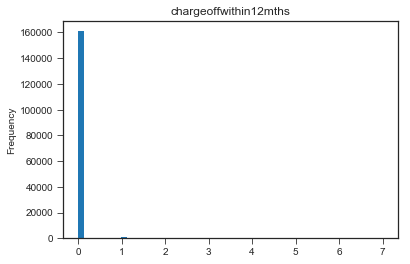

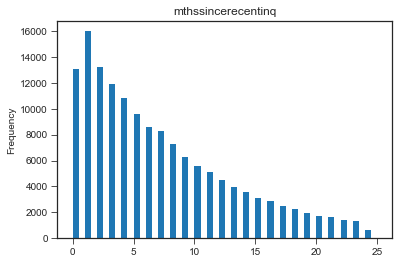

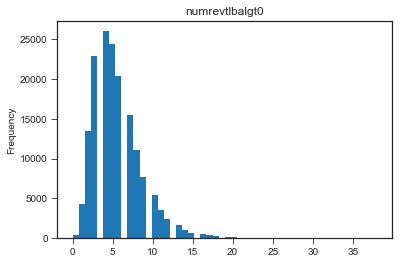

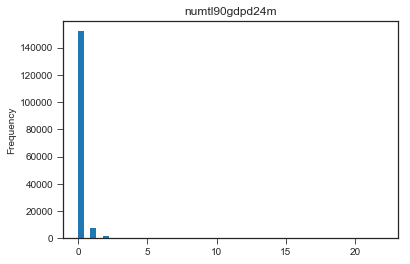

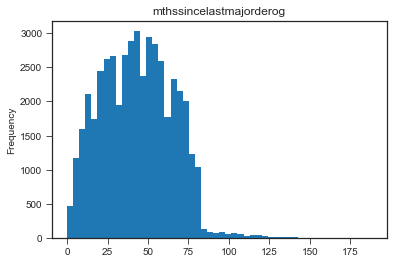

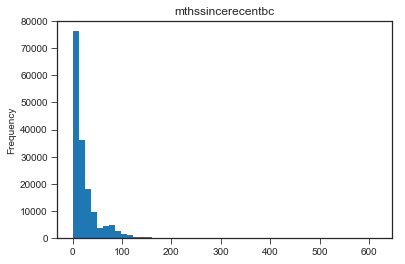

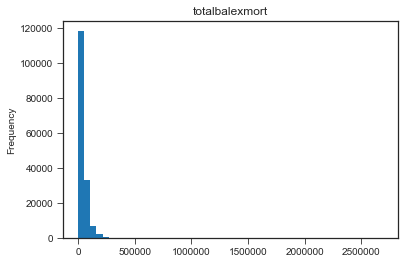

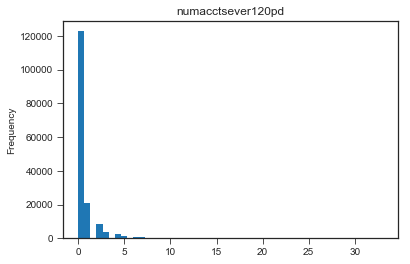

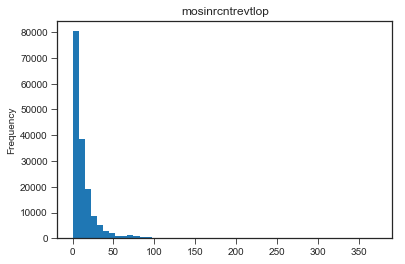

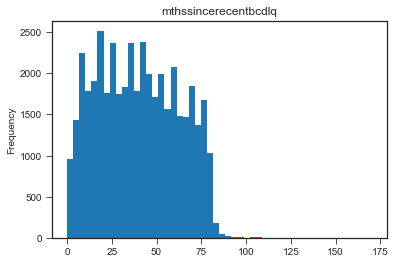

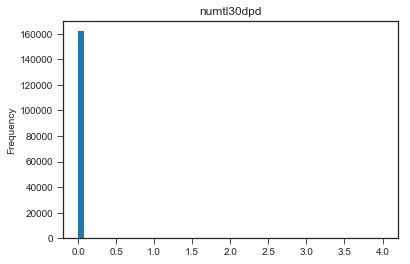

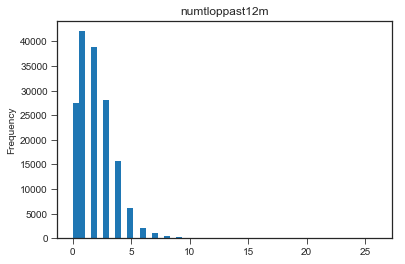

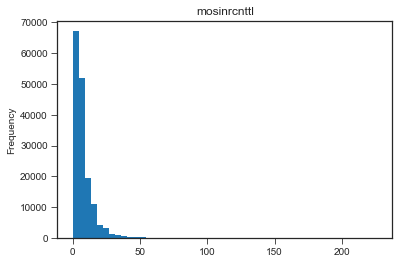

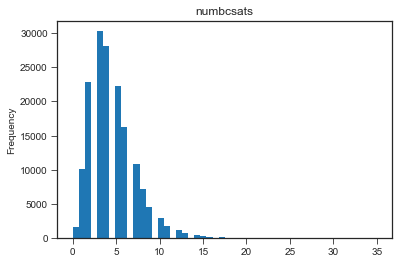

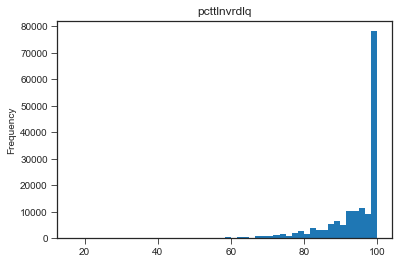

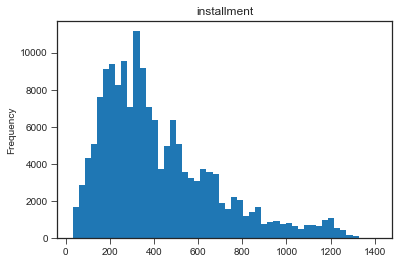

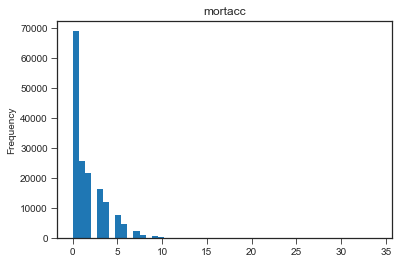

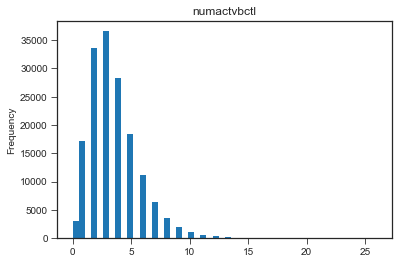

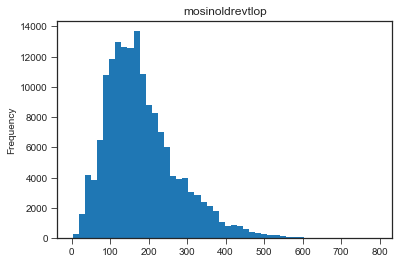

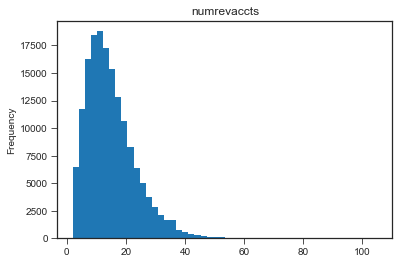

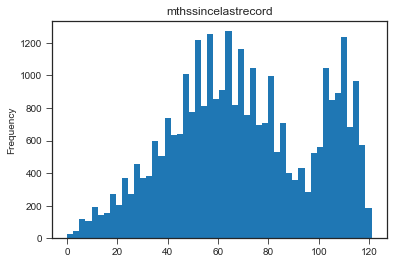

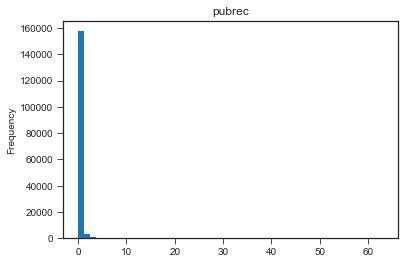

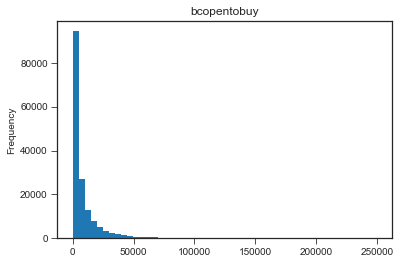

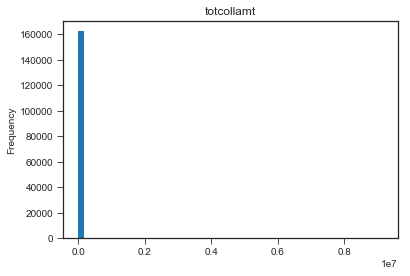

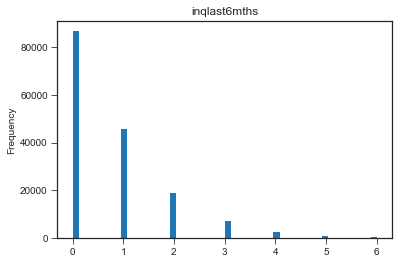

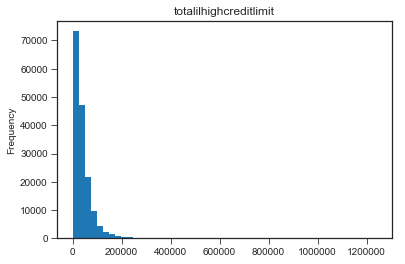

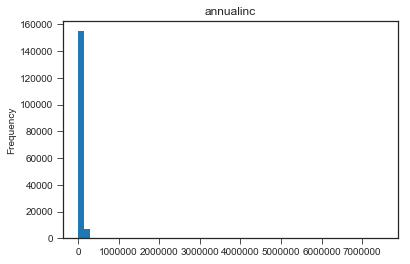

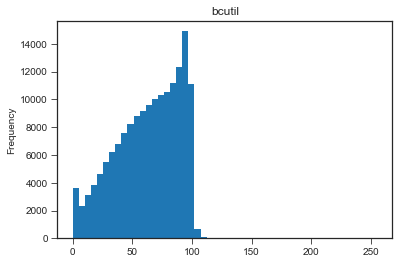

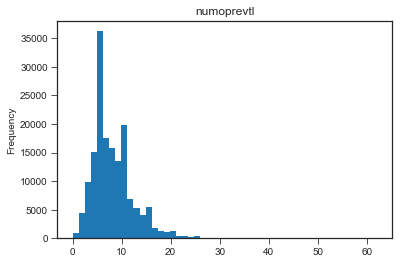

In [60]:
# plot histograms for all numeric variables
for ind in numcol:
    plt.figure()
    df.iloc[:, ind].plot(kind = 'hist', bins = 50)
    plt.title(df.columns.values[ind])

#### From the histograms, select the features without a good distribution (means most values are same)

In [70]:
num_bad_dist = ['collections12mthsexmed', 'pubrecbankruptcies', 'taxliens', 'totalrevhilim', 'accnowdelinq', 'numtl120dpd2m', 'revolbal', 'tothicredlim', 'delinqamnt', 'chargeoffwithin12mths', 'numtl90gdpd24m', 'totalbalexmort', 'numacctsever120pd', 'numtl30dpd', 'mosinrcnttl', 'pubrec', 'totcollamt', 'annualinc']

#### More exploration on the features without a good distribution: see whether the default rate is different in terms of different levels of this feature 

In [90]:
def countinuous_variable_plot(feat_name):
    sns.set_style("whitegrid", {'axes.edgecolor': '0'})
    factor = pd.qcut(df[feat_name], 5, labels = False) #groups the data act on groups                                                               #seperately
    table = df.groupby([factor, 'loanstatus']).size() #gets group size counts, hashed by the two variables
    table = table.unstack('loanstatus') #splits the data into 2 columns, 0, 1, each indexed by the
    normedtable = table.div(table.sum(1), axis=0) #divides the counts by the totals
    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    normedtable.iloc[:, 1].plot(kind = 'bar', alpha=0.9, color ="#FD2C10", ax = ax )
    ax.set_xlabel("%s percentile" % feat_name , fontsize = 20)
    ax.set_ylabel('Default Rate', fontsize = 20)
    x = range(5)
    labels = ['20%tile', '40%tile', '60%tile', '80%tile', '100%tile']
    plt.xticks(x, labels, rotation='0', fontsize = 18)
    sns.despine()
    ax.set_title("Loan Performance with respect to %s" % feat_name )
    fig.savefig('age.jpg')

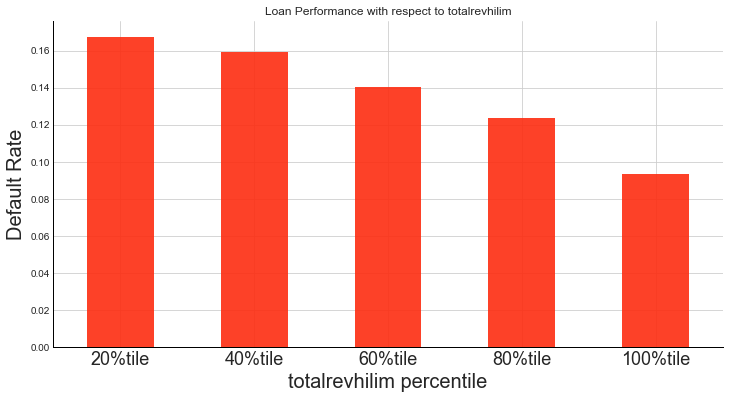

In [91]:
countinuous_variable_plot('totalrevhilim')

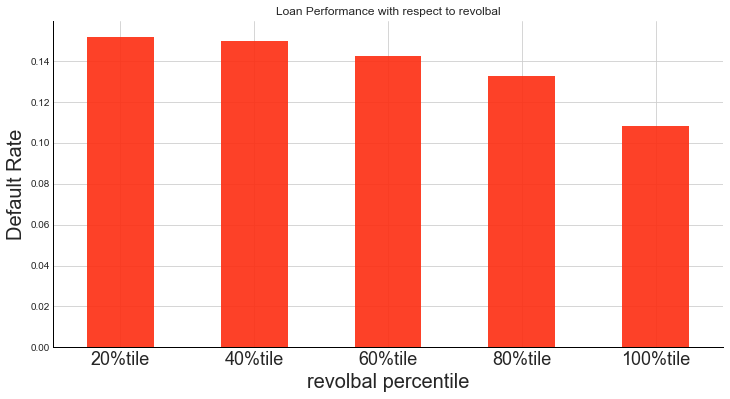

In [92]:
countinuous_variable_plot('revolbal')

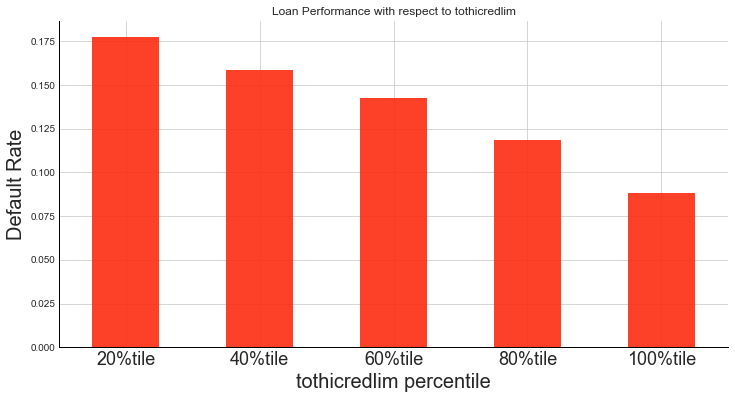

In [93]:
countinuous_variable_plot('tothicredlim')

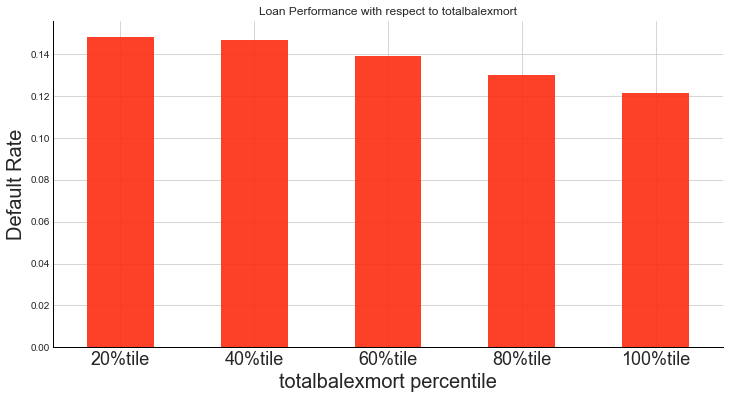

In [94]:
countinuous_variable_plot('totalbalexmort')

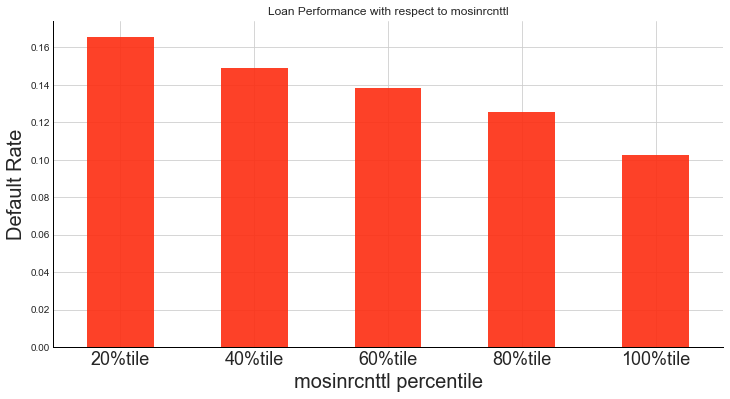

In [95]:
countinuous_variable_plot('mosinrcnttl')

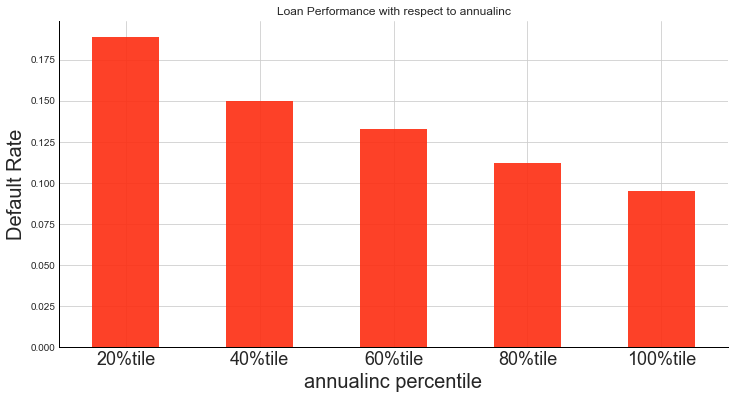

In [96]:
countinuous_variable_plot('annualinc')

#### Therefore, among the variables without a good distribution, totalrevhilim, revolbal, tothicredlim, totalbalexmort, mosinrcnttl, and annualinc may still be good features to identify the target variable (loanstatus).

In [99]:
not_useful = list(set(num_bad_dist) - set(['totalrevhilim', 'revolbal', 'tothicredlim', 'totalbalexmort', 'mosinrcnttl', 'annualinc']))

In [100]:
not_useful

['numtl30dpd',
 'accnowdelinq',
 'pubrec',
 'chargeoffwithin12mths',
 'pubrecbankruptcies',
 'totcollamt',
 'delinqamnt',
 'numtl120dpd2m',
 'taxliens',
 'numtl90gdpd24m',
 'numacctsever120pd',
 'collections12mthsexmed']

In [101]:
use_numeric = list(set(num_feature) - set(not_useful))

In [102]:
len(use_numeric)

44

#### For an issued loan, fundedamnt=loanamnt, drop fundedamnt

,fundedamnt,loanamnt
1,10400.0,10400.0
3,7650.0,7650.0
5,9600.0,9600.0
7,5250.0,5250.0
9,10000.0,10000.0
10,2500.0,2500.0
11,12975.0,12975.0
12,17000.0,17000.0
13,23325.0,23325.0
14,2000.0,2000.0


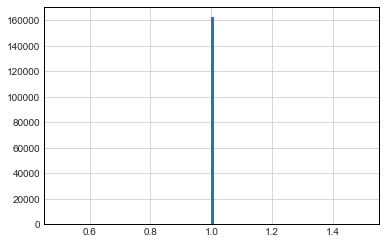

In [97]:
ratio=df.fundedamnt/df.loanamnt.astype(float,3)
ratio.hist(bins=100)
df[['fundedamnt','loanamnt']][:10]

In [103]:
use_numeric = list(set(use_numeric) - set(["fundedamnt"]))

In [104]:
len(use_numeric)

43

#### Missing values in numeric variables

In [110]:
df[use_numeric].shape

(162474, 43)

In [109]:
df[use_numeric].count()

numbctl                       162474
installment                   162474
accopenpast24mths             162474
mthssincerecentrevoldelinq     59255
totalbclimit                  162474
revolbal                      162474
mortacc                       162474
numactvrevtl                  162474
totcurbal                     162474
mthssincerecentinq            147072
numactvbctl                   162474
tothicredlim                  162474
numiltl                       162474
numrevaccts                   162474
totalbalexmort                162474
percentbcgt75                 160619
mthssincelastdelinq            82983
mthssincerecentbc             160866
numrevtlbalgt0                162474
openacc                       162474
numsats                       162474
mosinoldrevtlop               162474
inqlast6mths                  162474
totalilhighcreditlimit        162474
mosinrcnttl                   162474
bcopentobuy                   160718
bcutil                        160590
m

#### mthssincerecentrevoldelinq, mthssincelastdelinq, mthssincelastmajorderog, mthssincelastrecord, mthssincerecentbcdlq lost half or more than half of information in the dataset, therefore these five numeric variables will not be used in the next step

In [111]:
use_numeric = list(set(use_numeric) - set(['mthssincerecentrevoldelinq', 'mthssincelastdelinq', 'mthssincelastmajorderog', 'mthssincelastrecord', 'mthssincerecentbcdlq']))

In [112]:
len(use_numeric)

38

In [113]:
cat_feature

['emptitle',
 'desc',
 'term',
 'id',
 'zipcode',
 'intrate',
 'initialliststatus',
 'homeownership',
 'grade',
 'revolutil',
 'applicationtype',
 'emplength',
 'addrstate',
 'disbursementmethod',
 'subgrade',
 'earliestcrline',
 'purpose',
 'verificationstatus',
 'issued',
 'loanstatus']